In [6]:
import pandas as pd
import os
from src.get_dataset import get_dataset, split_data
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [7]:
DATASET = 'C:\\Users\\preet\\Documents\\mBRSET\\mbrset-a-mobile-brazilian-retinal-dataset-1.0\\'
DOWNLOAD = False
SHAPE = (224, 224)
IMAGES = os.path.join(DATASET, 'images')
LABEL = 'final_icdr'
TEST_SIZE = 0.3
UNDERSAMPLE = False
LABELS_PATH = os.path.join(DATASET, 'labels.csv')
IMAGE_COL = 'file'

In [8]:
df = pd.read_csv(LABELS_PATH) #read current labels file

# Missing diagnosis is assumed normal
df[LABEL].fillna(0, inplace=True)

image_labels = list(df[LABEL])
modified_labels=[]

# We create labels for each patient, even if one of the four views has any indication of retinopathy 
# we make the labels for all the eyes 1.0
for i in range(len(image_labels)//4):
    r = (image_labels[4*i] + image_labels[4*i+1] + image_labels[4*i+2] + image_labels[4*i+3])/4.0
    dec = int(r>=0.25)
    image_labels[4*i] = dec
    image_labels[4*i+1] = dec
    image_labels[4*i+2] = dec
    image_labels[4*i+3] = dec

df[LABEL] = image_labels 

#store this dataframe as a new csv file - labels_modified.csv
#df.to_csv(os.path.join(DATASET, 'labels_modified.csv'))
# Now we have created labels_modified, where the labels are consistent for a patient.

In order to remove the duplicate patients within the dataset, we are going to group rows of four into one row (all four images for a patient will be represented in one row and this will reduce the size of the dataset by 4). 

In [9]:
# Now group rows of four into one row
# Note that the labels are already consistent for all views
k = 4

df_subsampled = df.iloc[::k] #sample every fourth row of the dataset 
#now the size of df_subsampled is 1/4 the size of df 

df_subsampled['file2'] = list(df['file'])[1::k]  #choosing every second image for each patient
df_subsampled['file3'] = list(df['file'])[2::k] #choosing every third image for each patient
df_subsampled['file4'] = list(df['file'])[3::k] #choosing every fourth image for each patient

df_subsampled.rename(columns={"file": "file1"}, inplace=True) 

print(df_subsampled.shape)
df_subsampled.head()




(1291, 27)


C:\Users\preet\AppData\Local\Temp\ipykernel_11664\1657751060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled['file2'] = list(df['file'])[1::k]  #choosing every second image for each patient
C:\Users\preet\AppData\Local\Temp\ipykernel_11664\1657751060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled['file3'] = list(df['file'])[2::k] #choosing every third image for each patient
C:\Users\preet\AppData\Local\Temp\ipykernel_11664\1657751060.py:10: SettingWithCopyWarning: 
A val

,patient,age,sex,dm_time,insulin,insulin_time,oraltreatment_dm,systemic_hypertension,insurance,educational_level,...,diabetic_foot,file1,laterality,final_artifacts,final_quality,final_icdr,final_edema,file2,file3,file4
0,1,58,1,15.0,1.0,NaN,1.0,1.0,0.0,3.0,...,0.0,1.1.jpg,right,yes,yes,1,no,1.2.jpg,1.3.jpg,1.4.jpg
4,10,63,0,7.0,0.0,NaN,1.0,1.0,0.0,2.0,...,0.0,10.1.jpg,right,yes,yes,0,no,10.2.jpg,10.3.jpg,10.4.jpg
8,100,66,1,1.0,0.0,NaN,1.0,0.0,0.0,1.0,...,0.0,100.1.jpg,right,yes,yes,0,no,100.2.jpg,100.3.jpg,100.4.jpg
12,1000,50,0,2.0,0.0,NaN,1.0,0.0,0.0,5.0,...,0.0,1000.1.jpg,right,yes,yes,0,no,1000.2.jpg,1000.3.jpg,1000.4.jpg
16,1001,36,0,2.0,0.0,NaN,1.0,0.0,0.0,5.0,...,0.0,1001.1.jpg,right,yes,yes,0,no,1001.2.jpg,1001.3.jpg,1001.4.jpg


# Create the multi_labels.csv

Data preprocessing and creating new columns for discretizing age and diabetes diagnosis time features.

(1291, 26)
patient                        0
age                            0
sex                            0
dm_time                        0
insulin                        0
oraltreatment_dm               0
systemic_hypertension          0
insurance                      0
educational_level              0
alcohol_consumption            0
smoking                        0
obesity                        0
vascular_disease               0
acute_myocardial_infarction    0
nephropathy                    0
neuropathy                     0
diabetic_foot                  0
file1                          0
laterality                     0
final_artifacts                0
final_quality                  0
final_icdr                     0
final_edema                    0
file2                          0
file3                          0
file4                          0
dtype: int64
3 90


C:\Users\preet\AppData\Local\Temp\ipykernel_11664\4026669947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled.drop(columns=['insulin_time'],inplace=True)
C:\Users\preet\AppData\Local\Temp\ipykernel_11664\4026669947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled.fillna(0,inplace=True)
C:\Users\preet\AppData\Local\Temp\ipykernel_11664\4026669947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_su

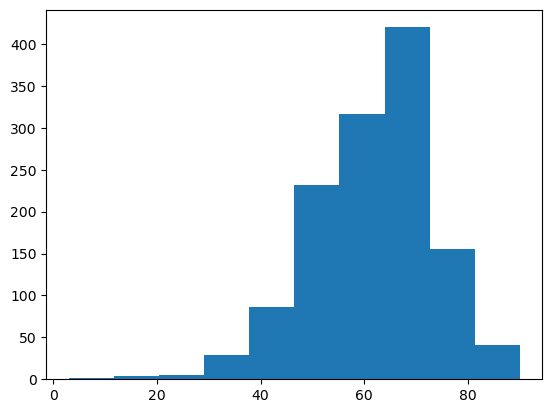

0 83


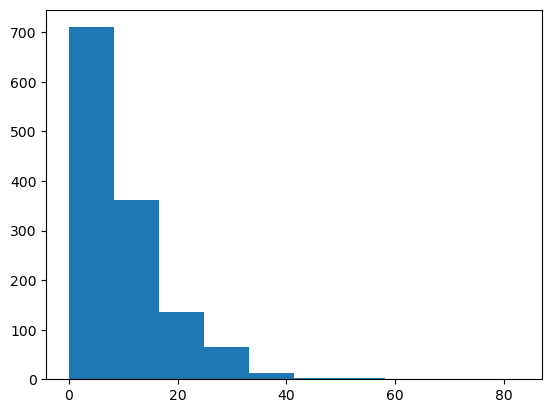

C:\Users\preet\AppData\Local\Temp\ipykernel_11664\4026669947.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled['age_index'] = np.rint((np.clip(df_subsampled['age'].astype(int).to_numpy(),10,90)-10)/11.0).astype(np.int32)
C:\Users\preet\AppData\Local\Temp\ipykernel_11664\4026669947.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsampled['dm_index'] = np.rint(np.clip(df_subsampled['dm_time'].to_numpy(),0,40)/6.0).astype(np.int32)


In [10]:
#Data preprocessing
df_subsampled.drop(columns=['insulin_time'],inplace=True) 
df_subsampled.fillna(0,inplace=True)
nan_counts = df_subsampled.isna().sum()
print(df_subsampled.shape)
print(nan_counts)
df_subsampled.replace('>= 90', '90', inplace=True)
print(np.amin(df_subsampled['age'].astype(int).to_numpy()),np.amax(df_subsampled['age'].astype(int).to_numpy()))
plt.hist(df_subsampled['age'].astype(int).to_numpy()) #histogram to visualize range of age feature
plt.show()

print(np.amin(df_subsampled['dm_time'].astype(int).to_numpy()),np.amax(df_subsampled['dm_time'].astype(int).to_numpy()))
plt.hist(df_subsampled['dm_time'].astype(int).to_numpy()) #histogram to visualize range of diabetes diagnosis time feature
plt.show()

# Now create columns for discretized age and dm
df_subsampled['age_index'] = np.rint((np.clip(df_subsampled['age'].astype(int).to_numpy(),10,90)-10)/11.0).astype(np.int32)
df_subsampled['dm_index'] = np.rint(np.clip(df_subsampled['dm_time'].to_numpy(),0,40)/6.0).astype(np.int32)

#Saving these modified dataset into new file - multi_labels_modified.csv
MULTILABELS_PATH = os.path.join(DATASET, 'multi_labels.csv')
df_subsampled.to_csv(MULTILABELS_PATH)